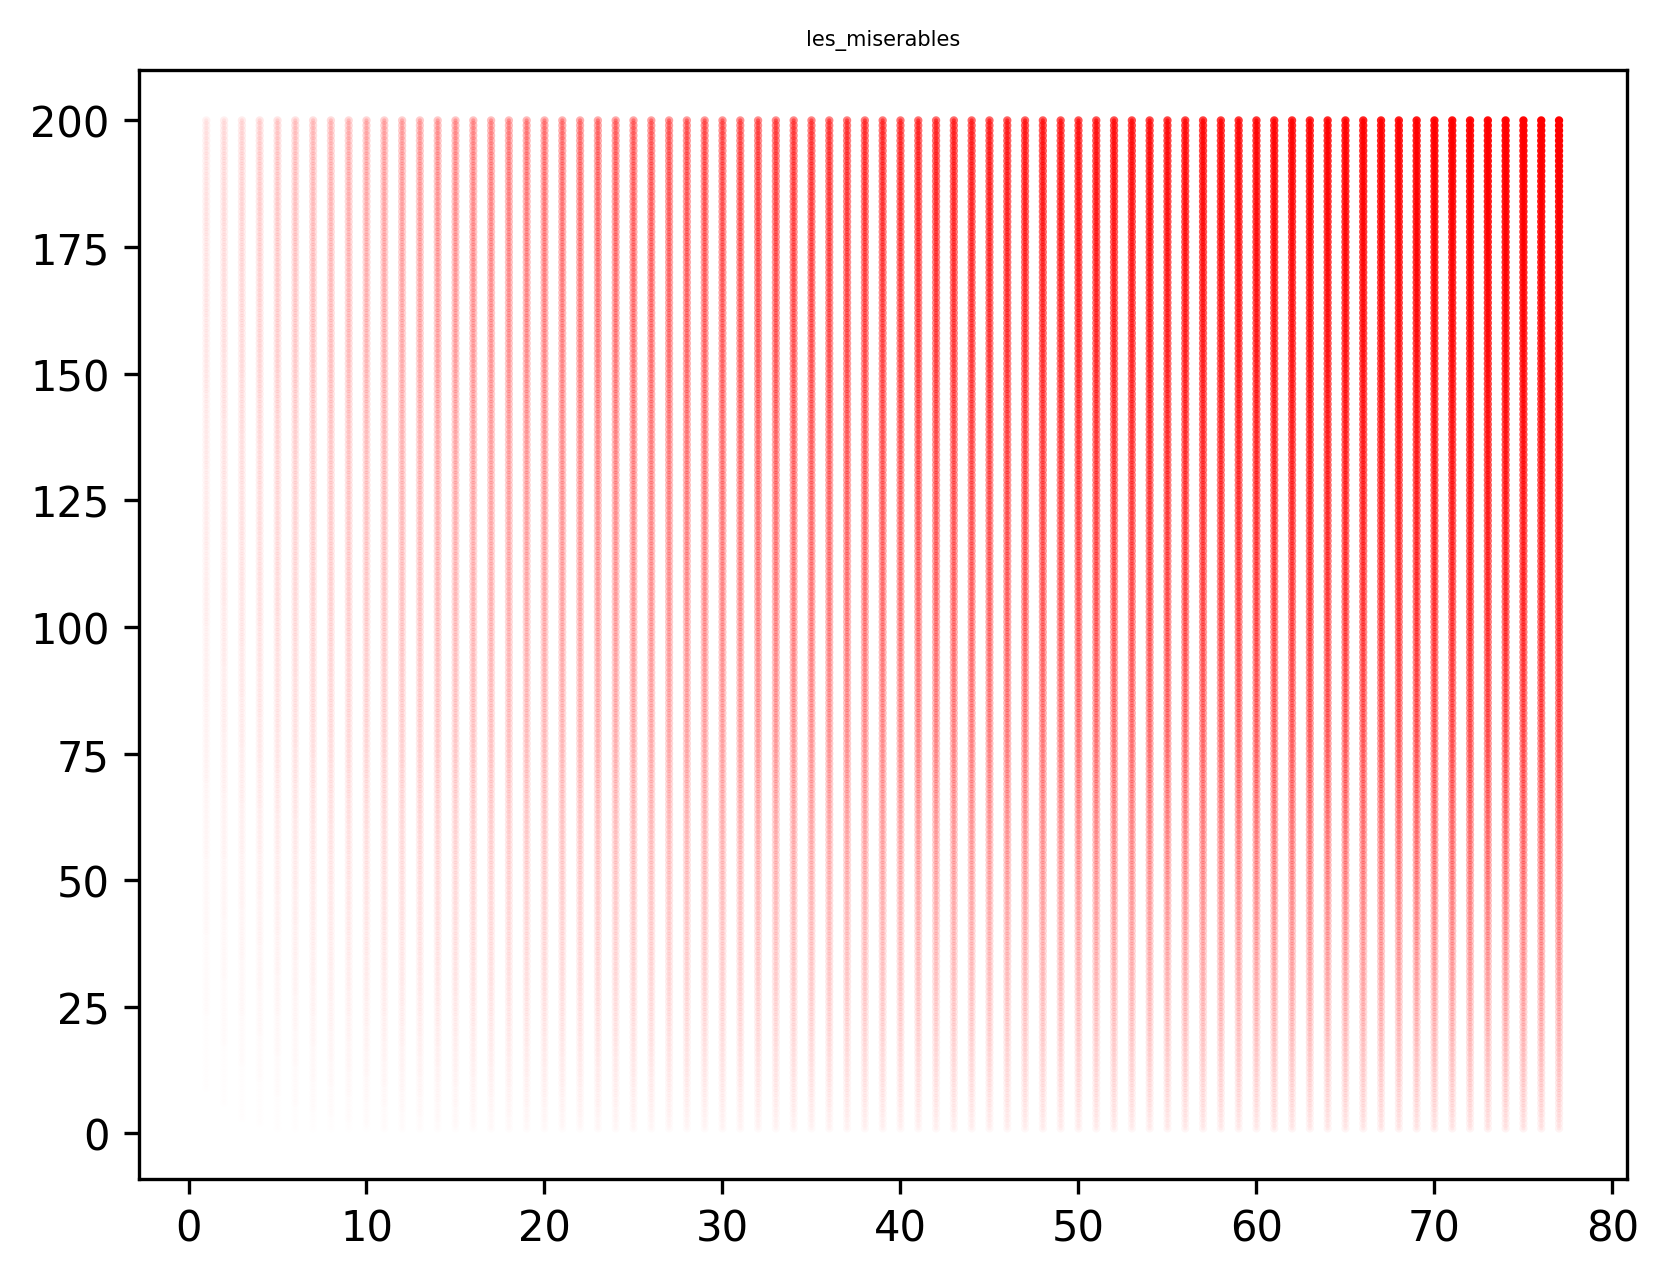

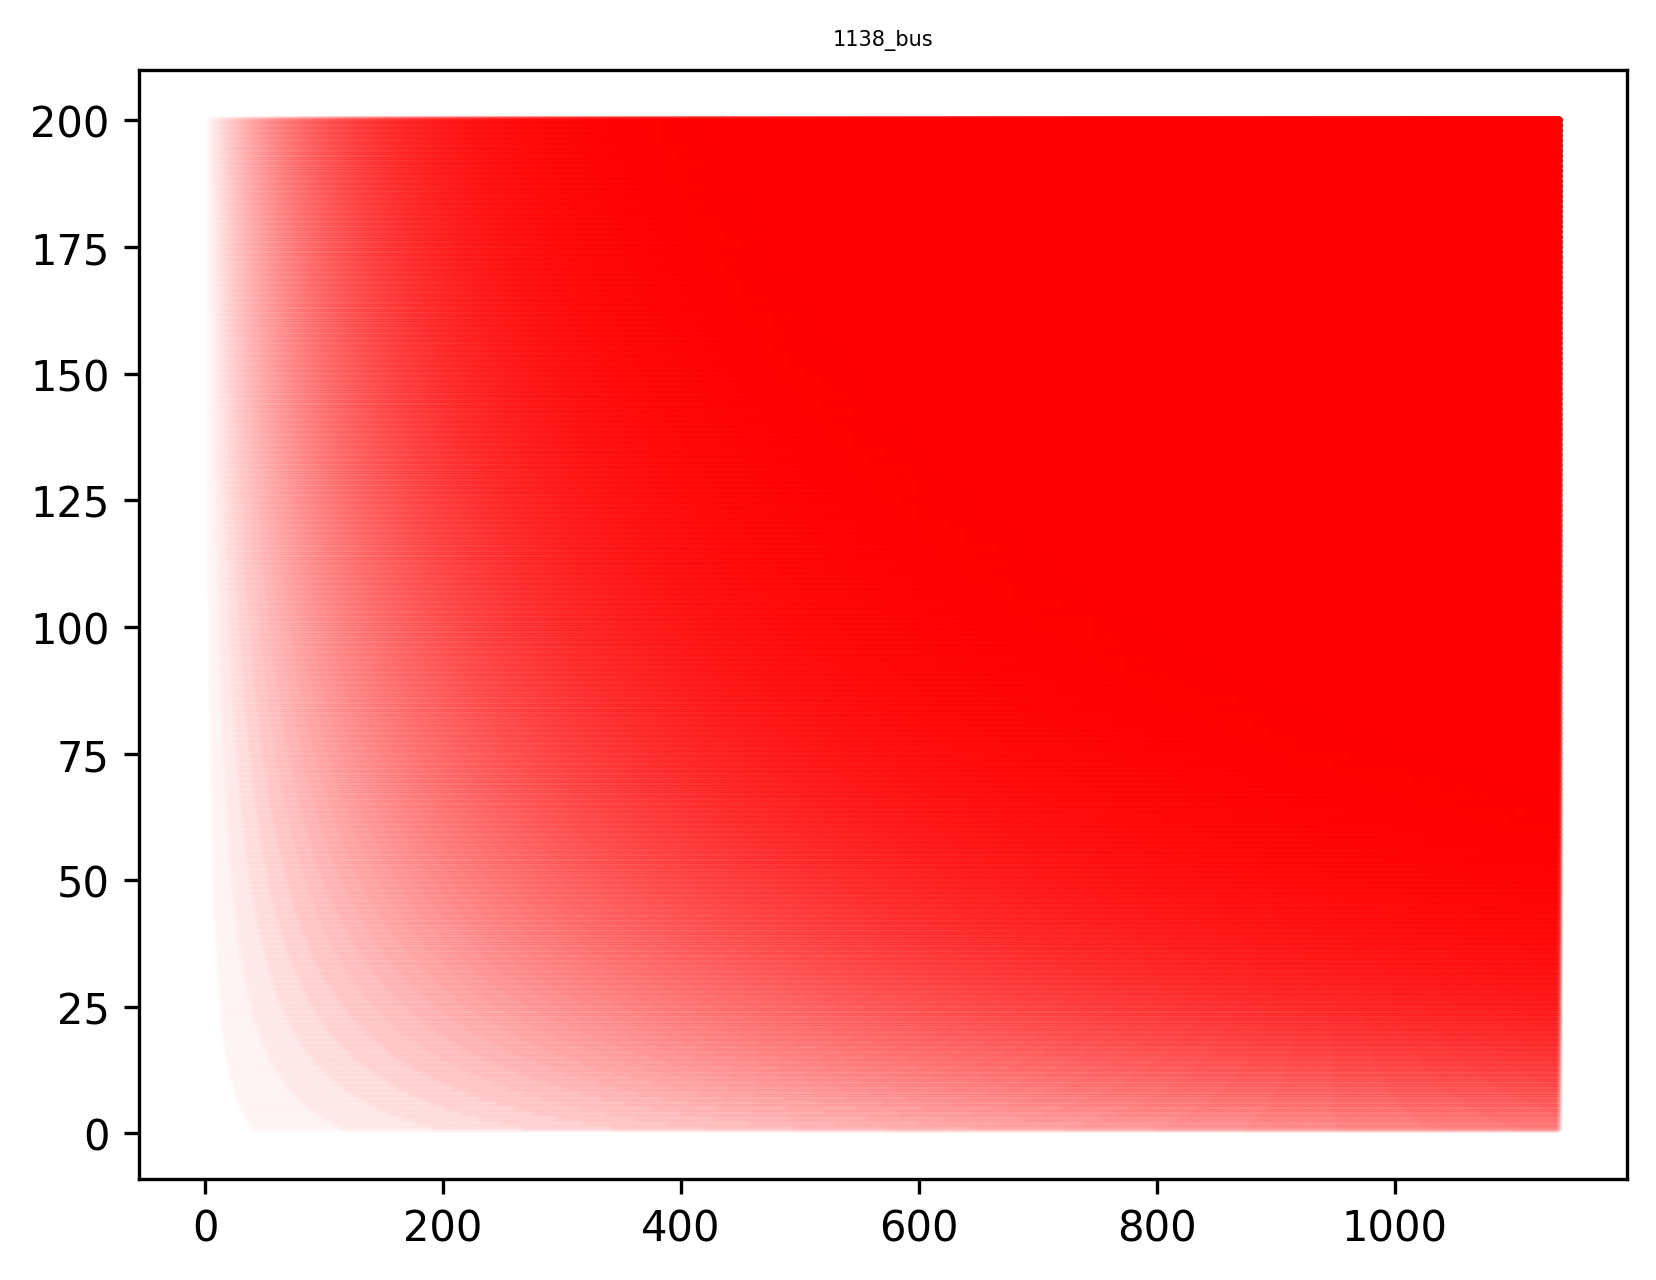

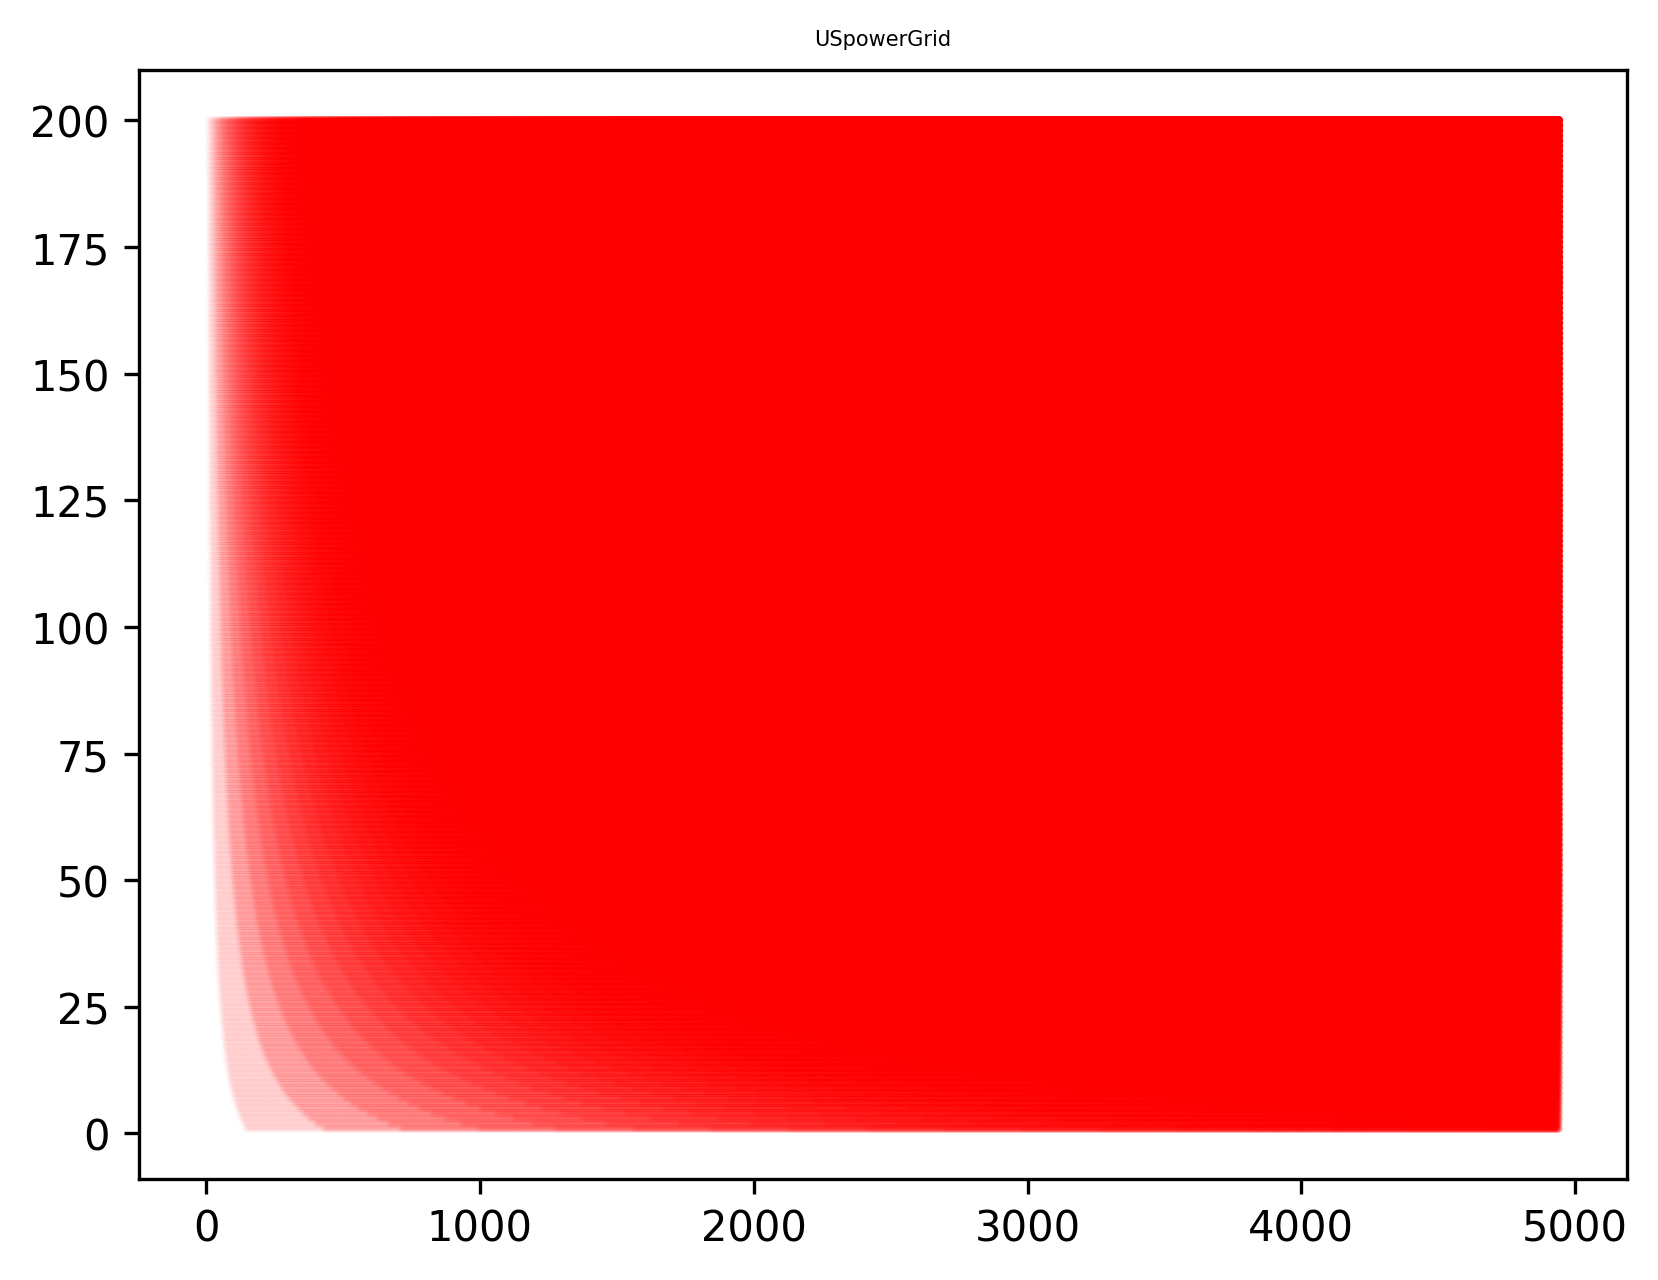

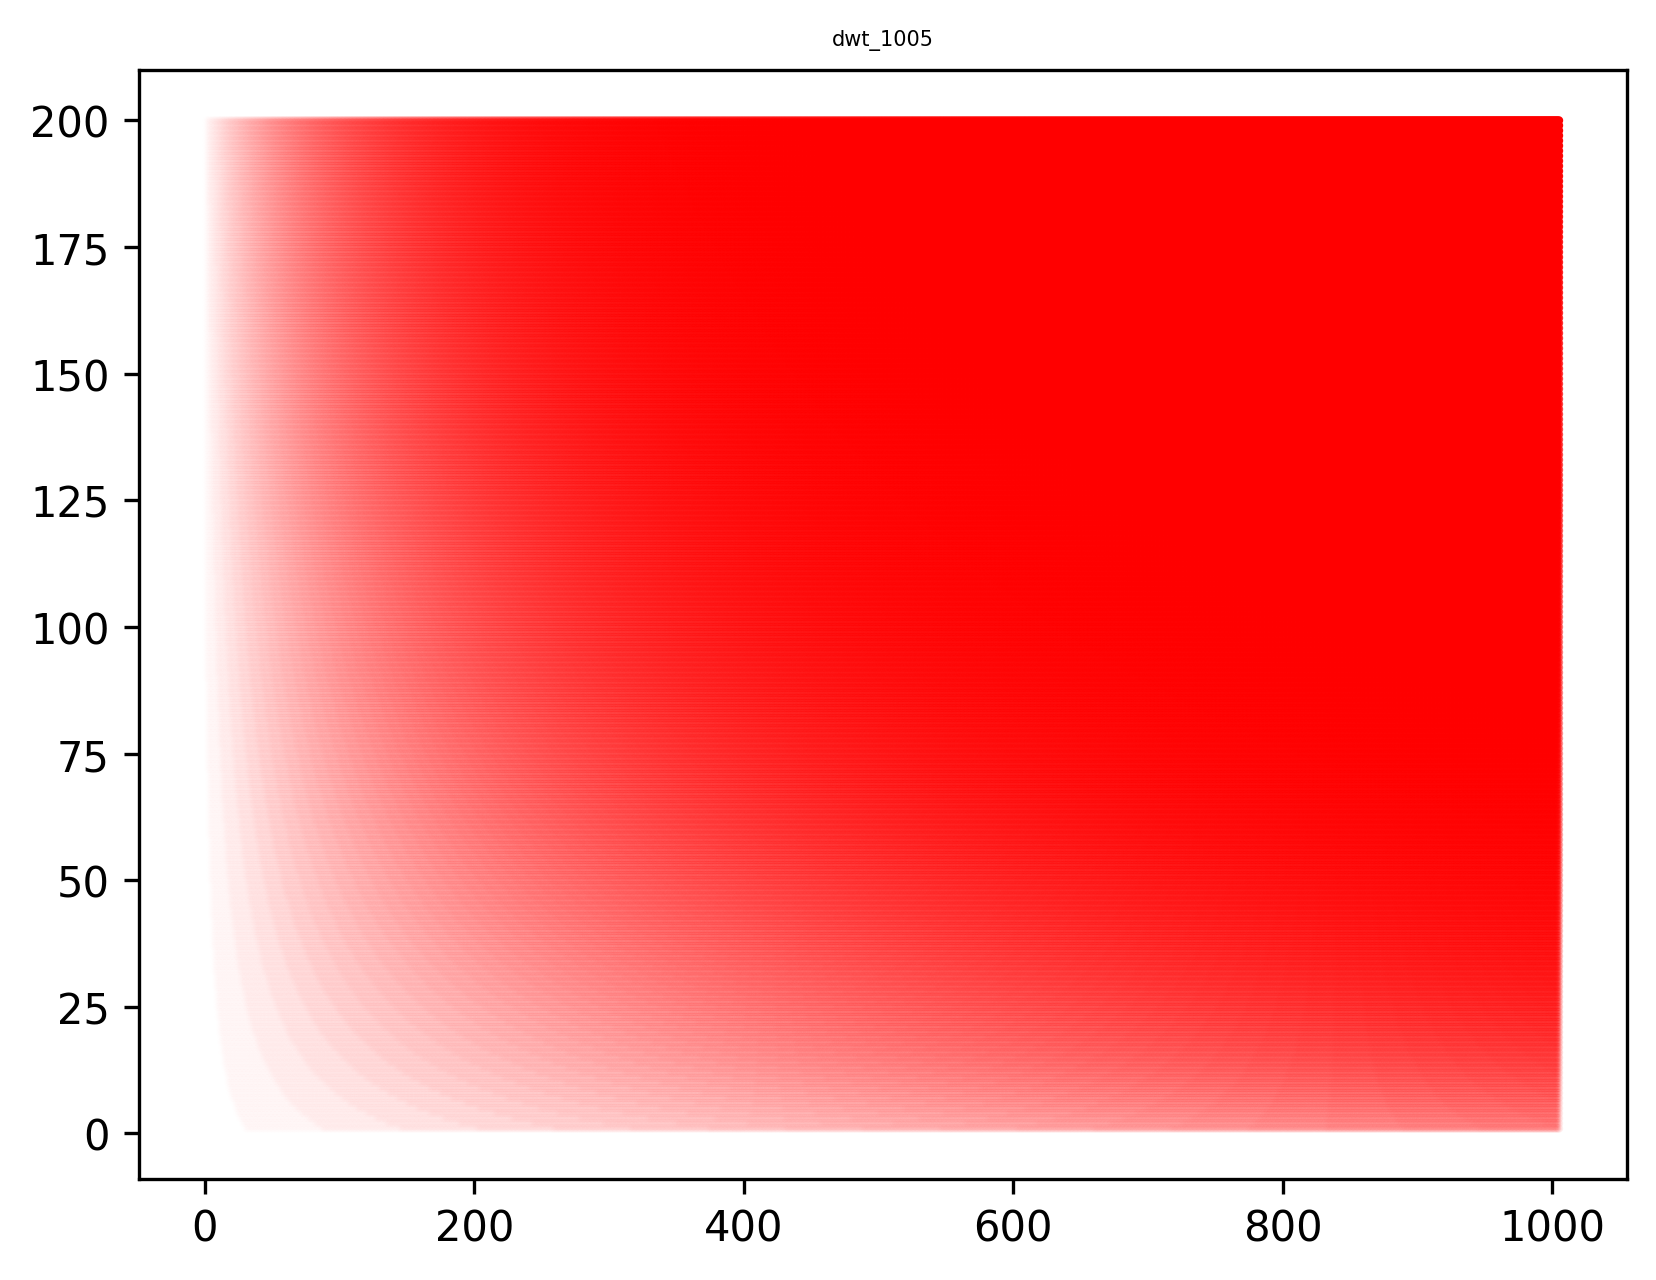

In [8]:
# Standard Library
import argparse
import math

# Third Party Library
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from egraph import Drawing, all_sources_bfs
from ex_utils.config.dataset import dataset_names
from ex_utils.config.paths import get_dataset_path
from ex_utils.config.quality_metrics import qm_name_abbreviations, qm_names
from ex_utils.share import (
    draw_and_measure,
    ex_path,
    generate_base_df_data,
    generate_mmscalers,
    generate_sscalers,
)
from ex_utils.utils.graph import (
    egraph_graph,
    load_nx_graph,
    nx_graph_preprocessing,
)
import numpy as np
from ex_utils.quality_metrics import time_complexity


n_bins = 50
EDGE_WEIGHT = 30

p_names = ["params_pivots", "params_iterations", "params_eps"]

for d_name in ["les_miserables", "1138_bus", "USpowerGrid", "dwt_1005"]:
    dataset_path = get_dataset_path(d_name)
    nx_graph = nx_graph_preprocessing(
        load_nx_graph(dataset_path=dataset_path), EDGE_WEIGHT
    )
    n_nodes = len(nx_graph.nodes)
    n_edges = len(nx_graph.edges)

    df_data = []
    for pivots in range(1, n_nodes + 1):
        for iterations in range(1, 200 + 1):
            df_data.append(
                {
                    "pivots": pivots,
                    "iterations": iterations,
                    "time_complexity": -time_complexity.measure(
                        pivots, iterations, n_nodes, n_edges
                    ),
                }
            )
    df = pd.DataFrame(df_data)
    # display(df.describe())
    fig, ax = plt.subplots(dpi=300, facecolor="white")
    # ax.set_aspect("equal")
    ax.set_title(f"{d_name}", fontsize=5)
    # df["v"] = df["pivots"] / n_nodes + df["iterations"] / 200

    # max_time = -np.sqrt(
    #     time_complexity.measure(n_nodes, 200, n_nodes, n_edges)
    # ) * (np.sqrt(time_complexity.measure(1, 1, n_nodes, n_edges)))
    l = time_complexity.measure(n_nodes, 200, n_nodes, n_edges)
    s = time_complexity.measure(1, 1, n_nodes, n_edges)
    df['time_complexity_minmax'] = (-df['time_complexity'] - s) / (l - s)
    # max_time = -(l + s) / 2
    # max_time = -(np.sqrt(l * s))
    # # max_time = -np.sqrt(l) * np.sqrt(s)
    # max_time = -(10**8)
    # # print(max_time)

    # adf = df.query(f"time_complexity > {max_time}")
    # bdf = df.query(f"time_complexity <= {max_time}")
    # ax.scatter(adf["pivots"], adf[f"iterations"], s=1, alpha=0.3)
    # ax.scatter(bdf["pivots"], bdf[f"iterations"], s=1, alpha=0.3, color="red")
    ax.scatter(df["pivots"], df[f"iterations"], s=1, alpha=df['time_complexity_minmax'], color="red")
    # display(adf.describe(), bdf.describe())
    plt.show()

In [2]:
time_complexity.measure(n_nodes, 200, n_nodes, n_edges)

216666598.9084216

In [3]:
c = 10**8
f = {"s": True, "l": True, "e": True}
for size in range(1, 100000):
    edges = size
    s = time_complexity.measure(1, 1, size, edges)
    l = time_complexity.measure(size, 200, size, edges)
    e = time_complexity.measure(50, 100, size, edges)
    if s > c and f["s"]:
        f["s"] = False
        print("s", size, edges, s)
    if l > c and f["l"]:
        f["l"] = False
        print("l", size, edges, l)
    if e > c and f["e"]:
        f["e"] = False
        print("e", size, edges, e)

l 689 689 100032561.56954636
e 17086 17086 100004808.27337965


In [4]:
size = 689
edges = 689
time_complexity.measure(size, 200, size, edges)

100032561.56954636

In [5]:
c = 10**8
f = {"s": True, "l": True, "e": True}
size, edges = 4941, 6594
for p in range(1, 1000):
    s = time_complexity.measure(p, 200, size, edges)
    # l = time_complexity.measure(size, 200, size, edges)
    # e = time_complexity.measure(50, 100, size, edges)
    if s > c and f["s"]:
        print(p)
        f["s"] = False
        print("s", size, edges, s)
    # if l > c and f["l"]:
    #     f["l"] = False
    #     print("l", size, edges, l)
    # if e > c and f["e"]:
    #     f["e"] = False
    #     print("e", size, edges, e)

94
s 4941 6594 100528559.37262021
